In [1]:
!python3 --version

Python 3.9.1


# 1st Assignment: NN's from Scratch 

By: Jan Leyva Massagué

The objective is to build from scratch a neural network to perform  classification. Let's firt consider the follwing 2-class dataset:

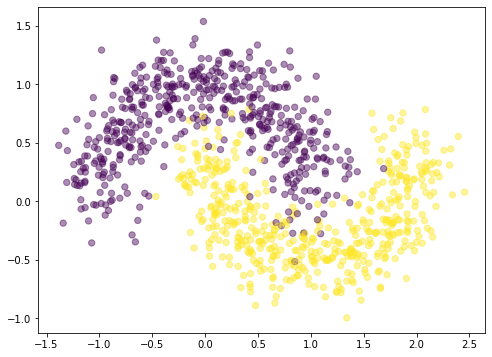

In [2]:
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import autograd.numpy as np
from autograd import grad
from autograd.misc import flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns

# import help functions for plot the Confusion Matrix
from help_functions import ConfMatrix


n = 1000

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(n, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, alpha=0.45)

In [1]:
import numpy
import matplotlib.pyplot as plt

def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = numpy.sqrt(numpy.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -numpy.cos(n)*n + numpy.random.rand(n_points,1) * noise
    d1y = numpy.sin(n)*n + numpy.random.rand(n_points,1) * noise
    return (numpy.vstack((numpy.hstack((d1x,d1y)),numpy.hstack((-d1x,-d1y)))), 
            numpy.hstack((numpy.zeros(n_points),numpy.ones(n_points))))

X, y = twospirals(500)

y = y.astype(int)


plt.title('training set')
plt.plot(X[y==0,0], X[y==0,1], '.', label='class 1')
plt.plot(X[y==1,0], X[y==1,1], '.', label='class 2')
plt.legend()
plt.show()

NameError: name 'np' is not defined

In [9]:
class nn():
    
    def __init(self):

        
        

    
        def loss(self, model):
            W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
            # Forward propagation to calculate our predictions
            z1 = np.dot(X,W1) + b1
            a1 = sigma(z1)
            z2 = np.dot(a1,W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            # Calculating the loss
            corect_logprobs = -np.log(probs[range(num_examples), y])
            data_loss = np.sum(corect_logprobs)
            # Add regulatization term to loss (optional)
            data_loss += reg_lambda * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
            return 1./num_examples * data_loss


        # forward propagation
        def predict(self, model, x):
            W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
            z1 = np.dot(x,W1) + b1
            a1 = sigma(z1)
            z2 = np.dot(a1,W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            return np.argmax(probs, axis=1)

    # This function learns parameters for the neural network and returns the model.
    # - nn_hdim: Number of nodes in the hidden layer
    # - num_passes: Number of passes through the training data for gradient descent
    # - print_loss: If True, print the loss every 1000 iterations

        def build_model(self, nn_hdim, num_passes=50000, print_loss=False):

            # Initialize the parameters to random values. 
            np.random.seed(0)
            W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
            b1 = np.zeros((1, nn_hdim))
            W2 = np.random.randn(nn_hdim, nn_hdim) / np.sqrt(nn_hdim)
            b2 = np.zeros((1, nn_hdim))
            W3 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
            b3 = np.zeros((1, nn_output_dim))

            # This is what we return at the end
            model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}

            # Gradient descent. For each batch...
            for i in range(0, num_passes):

                # Forward propagation
                predict(model, X)

                # computing the derivative by AD        
                gradient_loss = grad(loss)

                # flattening nested containers containing numpy arrays
                # Returns 1D numpy array and an unflatten function.
                model_flat, unflatten_m = flatten(model)
                grad_flat, unflatten_g = flatten(gradient_loss(model))

                # gradient descend
                model_flat -= grad_flat * epsilon
                model = unflatten_m(model_flat)

                # Optionally print the loss.
                # This is expensive because it uses the whole dataset, so we don't want to do it too often.
                if print_loss and i % 1000 == 0:
                    print("Loss after iteration %i: %f" %(i, loss(model)))

            return model

In [30]:
class nn():
    
    def __init__(self, X, nn_hdim, nn_input_dim, nn_output_dim,  actFunction = "tanh", 
                 num_passes=1000, epsilon = 0.03, reg_lambda = 0.01):
            
        self.X = X
        self.num_examples = len(X)  # training set size
        self.nn_input_dim = nn_input_dim  # input layer dimensionality
        self.nn_output_dim = nn_output_dim  # output layer dimensionality
        #self.actFunction = actFunction  # activation function
       
        #self.num_examples = len(X)
        # Gradient descent parameters 
        self.epsilon = epsilon  # learning rate for gradient descent
        self. reg_lambda = reg_lambda  # regularization strength
        # self.model = None 
        self.nn_hdim = nn_hdim
        self.num_passes = num_passes    
    
        if actFunction=='tanh'    : self.actFunction = self._tanh
        if actFunction=='ReLU'    : self.actFunction = self._reLU
                        
    def _tanh(self, x):
        return np.tanh(x)
    
    def _reLU(self, x):
        x = np.maximum(0, x)
        return x
    
            

    # loss function for a 4-layer MLP
    def loss(self, model):
        W1, b1, W2, b2, W3, b3 = self.model['W1'], self.model['b1'], self.model['W2'], self.model['b2'], self.model['W3'], self.model['b3']
        # Forward propagation to calculate our predictions
        z1 = np.dot(self.X,W1) + b1
        a1 = self.actFunction(z1)              # changed the activation function to `ReLU`
        z2 = np.dot(a1,W2) + b2
        a2 = self.actFunction(z2)              # changed the activation function to `ReLU`
        z3 = np.dot(a2,W3) + b3
        exp_scores = np.exp(z3)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Calculating the loss
        corect_logprobs = -np.log(probs[range(self.num_examples), y])
        data_loss = np.sum(corect_logprobs)
        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda * (np.sum(np.square(W1)) + np.sum(np.square(W2))) + np.sum(np.square(W3))
        return 1./self.num_examples * data_loss
    
    # forward propagation
    def predict(self, model, x):
        W1, b1, W2, b2, W3, b3 = self.model['W1'], self.model['b1'], self.model['W2'], self.model['b2'], self.model['W3'], self.model['b3']
        z1 = np.dot(x,W1) + b1
        a1 = self.actFunction(z1)              # changed the activation function to `ReLU`
        z2 = np.dot(a1,W2) + b2
        a2 = self.actFunction(z2)              # changed the activation function to `ReLU`
        z3 = np.dot(a2,W3) + b3
        exp_scores = np.exp(z3)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return np.argmax(probs, axis=1)
    

    
    # This function learns parameters for the neural network and returns the model.
    # - nn_hdim: Number of nodes in the hidden layer
    # - num_passes: Number of passes through the training data for gradient descent
    # - print_loss: If True, print the loss every 1000 iterations

    def build_model(self, print_loss=True):

        # Initialize the parameters to random values. 
        np.random.seed(0)
        W1 = np.random.randn(self.nn_input_dim, self.nn_hdim) / np.sqrt(self.nn_input_dim)
        b1 = np.zeros((1, self.nn_hdim))
        W2 = np.random.randn(self.nn_hdim, self.nn_hdim) / np.sqrt(self.nn_hdim)
        b2 = np.zeros((1, self.nn_hdim))
        W3 = np.random.randn(self.nn_hdim, self.nn_output_dim) / np.sqrt(self.nn_hdim)
        b3 = np.zeros((1, self.nn_output_dim))

        # This is what we return at the end
        self.model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}

        # Gradient descent. For each batch...
        for i in range(0, self.num_passes):

            # Forward propagation
            self.predict(self.model, self.X)

            # computing the derivative by AD        
            gradient_loss = grad(self.loss)

            # flattening nested containers containing numpy arrays
            # Returns 1D numpy array and an unflatten function.
            model_flat, unflatten_m = flatten(self.model)
            grad_flat, unflatten_g = flatten(gradient_loss(self.model))

            # gradient descend
            model_flat -= grad_flat * self.epsilon
            model = unflatten_m(model_flat)

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" %(i, self.loss(self.model)))

        return model

# Test v3

In [50]:
class nn():
    """
    nn: learns parameters for the neural network and returns the model and the last loss function value.
    You must define:
    - X: the data to fit [np. array]
    - nn_hdim: the dimension of hidden layer (number of neuros).
    - nn_input_dim: input dimension of the data.
    - nn_output_dim: dimension of the output.
    - actFunction: you can choose the activation function between:
        1. "tanh" : hyperbolic tangent (np.tanh).
        2. "ReLU" : ReLU function max(0, x).
    - num_passes: number of iterations.
    * Gradient descent parameters:
    - epsilon: learning rate for gradient descent.
    - reg_lambda: regularization strength.
    """
    
    
    def __init__(self, X, nn_hdim, nn_input_dim, nn_output_dim,  actFunction = "tanh", 
                 num_passes=1000, epsilon = 0.03, reg_lambda = 0.01):
            
        self.X = X
        self.num_examples = len(X)  # training set size
        self.nn_input_dim = nn_input_dim  # input layer dimensionality
        self.nn_output_dim = nn_output_dim  # output layer dimensionality
        #self.actFunction = actFunction  # activation function
               
        # Gradient descent parameters 
        self.epsilon = epsilon  # learning rate for gradient descent
        self. reg_lambda = reg_lambda  # regularization strength
        # self.model = None 
        self.nn_hdim = nn_hdim
        self.num_passes = num_passes    
    
        if actFunction=='tanh'    : self.actFunction = self._tanh
        if actFunction=='ReLU'    : self.actFunction = self._reLU
                        
    def _tanh(self, x):
        return np.tanh(x)
    
    def _reLU(self, x):
        x = np.maximum(0, x)
        return x
                

    # loss function for a 4-layer MLP
    def loss(self, model):
        W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
        # Forward propagation to calculate our predictions
        z1 = np.dot(self.X,W1) + b1
        a1 = self.actFunction(z1)              # changed the activation function to `ReLU`
        z2 = np.dot(a1,W2) + b2
        a2 = self.actFunction(z2)              # changed the activation function to `ReLU`
        z3 = np.dot(a2,W3) + b3
        exp_scores = np.exp(z3)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Calculating the loss
        corect_logprobs = -np.log(probs[range(self.num_examples), y])
        data_loss = np.sum(corect_logprobs)
        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda * (np.sum(np.square(W1)) + np.sum(np.square(W2))) + np.sum(np.square(W3))
        return 1./self.num_examples * data_loss
    
    # forward propagation
    def predict(self, model, x):
        W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
        z1 = np.dot(x,W1) + b1
        a1 = self.actFunction(z1)              # changed the activation function to `ReLU`
        z2 = np.dot(a1,W2) + b2
        a2 = self.actFunction(z2)              # changed the activation function to `ReLU`
        z3 = np.dot(a2,W3) + b3
        exp_scores = np.exp(z3)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return np.argmax(probs, axis=1)
    

    
    # This function learns parameters for the neural network and returns the model.
    # - nn_hdim: Number of nodes in the hidden layer
    # - num_passes: Number of passes through the training data for gradient descent
    # - print_loss: If True, print the loss every 1000 iterations

    def build_model(self, print_loss=False):

        # Initialize the parameters to random values. 
        np.random.seed(0)
        W1 = np.random.randn(self.nn_input_dim, self.nn_hdim) / np.sqrt(self.nn_input_dim)
        b1 = np.zeros((1, self.nn_hdim))
        W2 = np.random.randn(self.nn_hdim, self.nn_hdim) / np.sqrt(self.nn_hdim)
        b2 = np.zeros((1, self.nn_hdim))
        W3 = np.random.randn(self.nn_hdim, self.nn_output_dim) / np.sqrt(self.nn_hdim)
        b3 = np.zeros((1, self.nn_output_dim))

        # This is what we return at the end
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}

        # Gradient descent. For each batch...
        for i in range(0, self.num_passes):

            # Forward propagation
            self.predict(model, self.X)

            # computing the derivative by AD        
            gradient_loss = grad(self.loss)

            # flattening nested containers containing numpy arrays
            # Returns 1D numpy array and an unflatten function.
            model_flat, unflatten_m = flatten(model)
            grad_flat, unflatten_g = flatten(gradient_loss(model))

            # gradient descend
            model_flat -= grad_flat * self.epsilon
            model = unflatten_m(model_flat)

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" %(i, self.loss(model)))
                
            if i == (self.num_passes-1):
                print("End of the trainning process") 

        return model, loss_metric

In [47]:
nn_ = nn(X, nn_hdim = 3, nn_input_dim = 2, nn_output_dim = 2, actFunction = "ReLU", 
                 num_passes=3000, epsilon = 0.03, reg_lambda = 0.01)


modelv1, loss_ = nn_.build_model()

Loss after iteration 0: 0.609890
Loss after iteration 1000: 0.293254
Loss after iteration 2000: 0.279433


In [45]:
nn_ = nn(X, nn_hdim = 3, nn_input_dim = 2, nn_output_dim = 2, actFunction = "tanh", 
                 num_passes=3000, epsilon = 0.03, reg_lambda = 0.01)


modelv1 = nn_.build_model()

Loss after iteration 0: 0.615941
Loss after iteration 1000: 0.303017
Loss after iteration 2000: 0.287823


In [79]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.45)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.45)

    
# Plot the decision boundary
plot_decision_boundary(lambda x: nn.predict(modelv1, x))
plt.title("Decision Boundary for hidden layer size 3")

TypeError: predict() missing 1 required positional argument: 'x'

In [23]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
sigma = np.tanh # activation function

# Gradient descent parameters 
epsilon = 0.03 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [26]:
model_4layers = nn.build_model(3, X, nn_input_dim = 2, nn_output_dim = 2, print_loss=True)

TypeError: build_model() got multiple values for argument 'nn_input_dim'

In [12]:
nn.build_model(3, print_loss=True)

AttributeError: 'nn' object has no attribute 'build_model'